In [2]:
from mv.util import record_video_from_camera

# To record and save to a file (auto-named if not given):
# record_video_from_camera()  # Press ESC or Ctrl+C to stop

# Or specify a filename:
record_video_from_camera("my_recording.mp4")

Recording started. Saving to: my_recording.mp4
Press ESC in the window or Ctrl+C in the terminal to stop.
ESC pressed. Exiting.
Recording stopped. Video saved to: my_recording.mp4


'my_recording.mp4'

In [30]:
from mv.experiments.live_qr_codes import create_qr_code, grid_image

box_size = 10
qr_codes = [
    create_qr_code('black on white', fill_color='black', back_color='white', box_size=box_size),
    create_qr_code('white on black', fill_color='white', back_color='black', box_size=box_size),
    create_qr_code('blue on grey', fill_color='blue', back_color='grey', box_size=box_size),
    create_qr_code('aqua on green', fill_color='aqua', back_color='green', box_size=box_size),
    create_qr_code('red on yellow', fill_color='red', back_color='yellow', box_size=box_size),
    create_qr_code('purple on pink', fill_color='purple', back_color='pink', box_size=box_size),
    create_qr_code('orange on brown', fill_color='orange', back_color='brown', box_size=box_size),
    create_qr_code('yellow on red', fill_color='yellow', back_color='red', box_size=box_size),
]

im = grid_image(qr_codes, n_rows=4, n_cols=2, h_padding=30, v_padding=30)
im.save('qr_codes.png')

In [ ]:
import theremin

In [ ]:
import meshed

# `mv` Tidbits

## Reading webm

In [17]:
# 1. Display the video inline
from IPython.display import Video

# Path to your WebM file
video_path = "/Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm"

# This will embed a small player below the cell
Video(video_path, embed=True, width=480)

In [21]:
import cv2

def frame_iterator(path):
    """
    Yields (frame_index, timestamp_ms, frame_bgr) for each frame of the video.
    """
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {path}")
    idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        # timestamp in ms
        ts = cap.get(cv2.CAP_PROP_POS_MSEC)
        yield idx, ts, frame
        idx += 1
    cap.release()


In [22]:
video_path = "/Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm"
frames = list(frame_iterator(video_path))
len(frames) 

[matroska,webm @ 0x107597490] EBML header parsing failed
OpenCV: Couldn't read video stream from file "/Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm"


OSError: Cannot open video /Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm

In [ ]:
f = '/Users/thorwhalen/tmp/mv_video_saves/test/20250512T080630.581_chunk.webm'



In [27]:
import cv2

def frame_iterator(path):
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {path}")
    idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        ts = cap.get(cv2.CAP_PROP_POS_MSEC)
        yield idx, ts, frame  # frame is a NumPy array (BGR)
        idx += 1
    cap.release()

# Example: display first 3 frames
from matplotlib import pyplot as plt
for i, ts, frame in frame_iterator(path):
    if i >= 3: break
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title(f"Frame {i} @ {ts:.0f} ms")
    plt.axis('off')
    plt.show()

[matroska,webm @ 0x137fa0b10] EBML header parsing failed
OpenCV: Couldn't read video stream from file "/Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm"


OSError: Cannot open video /Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm

In [28]:
import imageio

reader = imageio.get_reader(path, 'ffmpeg')
for i, frame in enumerate(reader):
    if i >= 3: break
    from matplotlib import pyplot as plt
    plt.imshow(frame)  # frame is already RGB
    plt.title(f"Frame {i}")
    plt.axis('off')
    plt.show()

OSError: Could not load meta information
=== stderr ===

ffmpeg version 7.1 Copyright (c) 2000-2024 the FFmpeg developers
  built with Apple clang version 13.1.6 (clang-1316.0.21.2.5)
  configuration: --prefix=/Volumes/tempdisk/sw --extra-cflags=-fno-stack-check --arch=arm64 --cc=/usr/bin/clang --enable-gpl --enable-libvmaf --enable-libopenjpeg --enable-libopus --enable-libmp3lame --enable-libx264 --enable-libx265 --enable-libvpx --enable-libwebp --enable-libass --enable-libfreetype --enable-fontconfig --enable-libtheora --enable-libvorbis --enable-libsnappy --enable-libaom --enable-libvidstab --enable-libzimg --enable-libsvtav1 --enable-libharfbuzz --enable-libkvazaar --pkg-config-flags=--static --enable-ffplay --enable-postproc --enable-neon --enable-runtime-cpudetect --disable-indev=qtkit --disable-indev=x11grab_xcb
  libavutil      59. 39.100 / 59. 39.100
  libavcodec     61. 19.100 / 61. 19.100
  libavformat    61.  7.100 / 61.  7.100
  libavdevice    61.  3.100 / 61.  3.100
  libavfilter    10.  4.100 / 10.  4.100
  libswscale      8.  3.100 /  8.  3.100
  libswresample   5.  3.100 /  5.  3.100
  libpostproc    58.  3.100 / 58.  3.100
[matroska,webm @ 0x1536073d0] Format matroska,webm detected only with low score of 1, misdetection possible!
[matroska,webm @ 0x1536073d0] EBML header parsing failed
[in#0 @ 0x153607180] Error opening input: Invalid data found when processing input
Error opening input file /Users/thorwhalen/tmp/mv_video_saves/test/20250512T080545.711_chunk.webm.
Error opening input files: Invalid data found when processing input

## Scan for video indices

In [1]:
from mv.util import scan_for_openable_video_indices

openable_indices = list(scan_for_openable_video_indices())

2025-05-08 14:05:29.653 python[70891:1228045] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
OpenCV: out device of bound (0-1): 2
OpenCV: camera failed to properly initialize!
OpenCV: out device of bound (0-1): 3
OpenCV: camera failed to properly initialize!
OpenCV: out device of bound (0-1): 4
OpenCV: camera failed to properly initialize!


In [2]:
openable_indices

[{'index': 0,
  'frame_width': 1920.0,
  'frame_height': 1080.0,
  'fps': 30.0,
  'zoom': 0.0,
  'backend': 1200.0},
 {'index': 1,
  'frame_width': 1920.0,
  'frame_height': 1080.0,
  'fps': 1.0,
  'zoom': 0.0,
  'backend': 1200.0}]

In [3]:
from mv.wip import live_qr_codes as qr 

In [4]:
dir(qr)

['Callable',
 'DFLT_SOURCE',
 'OverlayManager',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'compute_display_data_example1',
 'compute_display_data_example2',
 'compute_display_data_example3',
 'compute_display_data_example4',
 'contextlib',
 'create_qr_code',
 'cv2',
 'default_displayer',
 'grid_image',
 'make_qr_detector',
 'np',
 'overlay_manager',
 'run_example_with_qr_detector',
 'run_video_pipeline',
 'time',
 'video_capture']

In [ ]:
dotpath_to_pyobj('mv.wip.live_qr_codes.compute_display_data_example1')

<function mv.wip.live_qr_codes.compute_display_data_example1(detection_result, frame)>

# Scrap

In [5]:
f = '/Users/thorwhalen/.config/mv/media_recordings/vtest/250512_123655/20250512T123655696Z_20250512T123700709Z.webm'

# Make ipython video display object with f (webm)
from IPython.display import Video
v = Video(f, embed=True, width=480)



In [6]:
# get frames of the video
import cv2
def frame_iterator(path):
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        raise IOError(f"Cannot open video {path}")
    idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        ts = cap.get(cv2.CAP_PROP_POS_MSEC)
        yield idx, ts, frame  # frame is a NumPy array (BGR)
        idx += 1
    cap.release()
frames = list(frame_iterator(f))

len(frames)


149

(480, 640, 3)

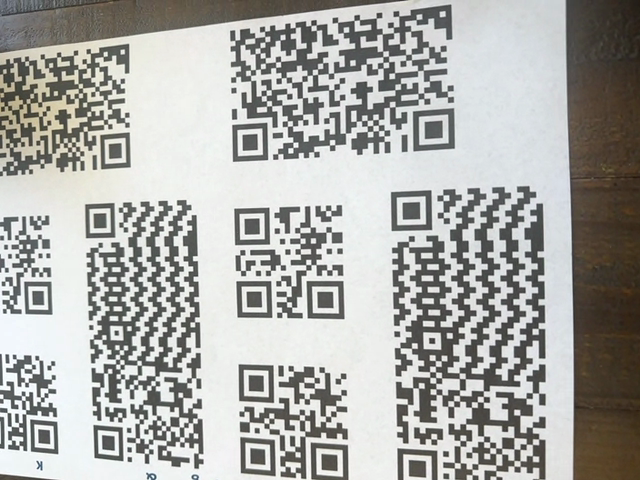

In [7]:
from IPython.display import display, Image
# display first frame as an image
from PIL import Image
first_frame = frames[40][2]  # Get the first frame (BGR)
first_frame_rgb = cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = Image.fromarray(first_frame_rgb)
display(img)  # Display the image in the notebook

In [ ]:
# detect QR codes in the first frame

qr_codes = detect_qr_codes(first_frame_rgb)
# Display detected QR codes
for qr in qr_codes:
    print(f"QR Code Data: {qr.data}, Type: {qr.type}")
    display(qr.image)  # Display the QR code image

Moved to mv.wip.live_qr_codes. Please change imports accordingly.


ImportError: cannot import name 'detect_qr_codes' from 'mv.experiments.live_qr_codes' (/Users/thorwhalen/Dropbox/py/proj/t/mv/mv/experiments/live_qr_codes.py)

In [9]:
"""QR Code location detection module using OpenCV.

This module provides functionality to detect QR codes in images and return their locations.
Uses only opencv-python with its built-in QRCodeDetector.
"""

from dataclasses import dataclass
from typing import Iterator, Union, Sequence, Protocol, Optional
from pathlib import Path
import cv2
import numpy as np


@dataclass(frozen=True)
class BoundingBox:
    """Represents a rectangular bounding box."""
    x: int
    y: int
    width: int
    height: int
    
    @property
    def center(self) -> tuple[int, int]:
        """Get center coordinates of the bounding box.
        
        >>> box = BoundingBox(10, 20, 30, 40)
        >>> box.center
        (25, 40)
        """
        return (self.x + self.width // 2, self.y + self.height // 2)


@dataclass(frozen=True)
class QRCodeLocation:
    """Represents a detected QR code with its location and data."""
    data: str
    bounding_box: BoundingBox
    polygon_points: tuple[tuple[int, int], ...]
    confidence: float = 1.0
    
    @property
    def center(self) -> tuple[int, int]:
        """Get center coordinates of the QR code."""
        return self.bounding_box.center


class ImageLike(Protocol):
    """Protocol for image-like objects that can be converted to numpy arrays."""
    def __array__(self) -> np.ndarray: ...


def _load_image(image_source: Union[str, Path, np.ndarray, ImageLike]) -> np.ndarray:
    """Load image from various sources into numpy array format.
    
    Args:
        image_source: Path to image file, numpy array, or image-like object
        
    Returns:
        Image as numpy array in BGR format (OpenCV standard)
        
    Raises:
        ValueError: If image cannot be loaded or is invalid
    """
    if isinstance(image_source, (str, Path)):
        image = cv2.imread(str(image_source))
        if image is None:
            raise ValueError(f"Could not load image from {image_source}")
        return image
    elif isinstance(image_source, np.ndarray):
        return _normalize_image_array(image_source)
    else:
        # Assume it's an image-like object (PIL Image, etc.)
        try:
            array = np.array(image_source)
            return _normalize_image_array(array)
        except Exception as e:
            raise ValueError(f"Could not convert image source to array: {e}")


def _normalize_image_array(array: np.ndarray) -> np.ndarray:
    """Normalize image array to OpenCV BGR format.
    
    Args:
        array: Input image array (grayscale, RGB, or BGR)
        
    Returns:
        Image array in BGR format suitable for OpenCV
        
    Raises:
        ValueError: If array has invalid shape or data type
    """
    if not isinstance(array, np.ndarray):
        raise ValueError("Input must be a numpy array")
    
    # Ensure we have the right data type
    if array.dtype != np.uint8:
        if array.dtype in [np.float32, np.float64]:
            # Assume normalized float values [0, 1]
            if array.max() <= 1.0:
                array = (array * 255).astype(np.uint8)
            else:
                array = array.astype(np.uint8)
        else:
            array = array.astype(np.uint8)
    
    # Handle different array shapes
    if len(array.shape) == 2:
        # Grayscale image - convert to BGR
        return cv2.cvtColor(array, cv2.COLOR_GRAY2BGR)
    elif len(array.shape) == 3:
        if array.shape[2] == 1:
            # Single channel with explicit dimension
            return cv2.cvtColor(array.squeeze(axis=2), cv2.COLOR_GRAY2BGR)
        elif array.shape[2] == 3:
            # Assume RGB format (common for matrices from other libraries)
            # Convert RGB to BGR for OpenCV
            return cv2.cvtColor(array, cv2.COLOR_RGB2BGR)
        elif array.shape[2] == 4:
            # RGBA format - drop alpha channel and convert
            rgb_array = array[:, :, :3]
            return cv2.cvtColor(rgb_array, cv2.COLOR_RGB2BGR)
        else:
            raise ValueError(f"Unsupported channel count: {array.shape[2]}")
    else:
        raise ValueError(f"Unsupported array shape: {array.shape}")


def _points_to_bounding_box(points: np.ndarray) -> BoundingBox:
    """Convert polygon points to bounding box.
    
    Args:
        points: Array of shape (4, 2) representing polygon corners
        
    Returns:
        BoundingBox encompassing the polygon
    """
    x_coords = points[:, 0]
    y_coords = points[:, 1]
    
    x_min, x_max = int(np.min(x_coords)), int(np.max(x_coords))
    y_min, y_max = int(np.min(y_coords)), int(np.max(y_coords))
    
    return BoundingBox(
        x=x_min,
        y=y_min,
        width=x_max - x_min,
        height=y_max - y_min
    )


def _normalize_polygon_points(points: np.ndarray) -> tuple[tuple[int, int], ...]:
    """Convert OpenCV points array to tuple of coordinate pairs.
    
    Args:
        points: Array of shape (4, 2) representing polygon corners
        
    Returns:
        Tuple of (x, y) coordinate pairs
    """
    return tuple((int(point[0]), int(point[1])) for point in points)


def _create_qr_location(data: str, points: np.ndarray, *, confidence: float = 1.0) -> QRCodeLocation:
    """Create QRCodeLocation from detection data.
    
    Args:
        data: Decoded QR code string
        points: Array of polygon corner points
        confidence: Detection confidence score
        
    Returns:
        QRCodeLocation instance with extracted information
    """
    bounding_box = _points_to_bounding_box(points)
    polygon_points = _normalize_polygon_points(points)
    
    return QRCodeLocation(
        data=data,
        bounding_box=bounding_box,
        polygon_points=polygon_points,
        confidence=confidence
    )


def _preprocess_image(img: np.ndarray, *, strategy: str = "adaptive") -> Iterator[np.ndarray]:
    """Generate preprocessed versions of image for better QR detection.
    
    Args:
        img: Input image
        strategy: Preprocessing strategy ("adaptive", "gaussian", "bilateral")
        
    Yields:
        Preprocessed image variants
    """
    # Convert to grayscale if needed
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()
    
    # Always yield original grayscale
    yield gray
    
    if strategy == "adaptive":
        # Adaptive thresholding for varying lighting
        adaptive = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY, 11, 2
        )
        yield adaptive
        
    elif strategy == "gaussian":
        # Gaussian blur followed by thresholding
        blurred = cv2.GaussianBlur(gray, (5, 5), 0)
        _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        yield thresh
        
    elif strategy == "bilateral":
        # Bilateral filter to reduce noise while keeping edges
        filtered = cv2.bilateralFilter(gray, 9, 75, 75)
        yield filtered


def detect_qr_codes(
    image: Union[str, Path, np.ndarray, ImageLike],
    *,
    enhance_detection: bool = True,
    preprocessing_strategy: str = "adaptive",
    min_confidence: float = 0.0
) -> Iterator[QRCodeLocation]:
    """Detect QR codes in an image and yield their locations.
    
    Args:
        image: Image source - can be:
            - File path (str/Path)
            - RGB numpy array of shape (height, width, 3) with values 0-255
            - Grayscale numpy array of shape (height, width)
            - Any image-like object with __array__ method
        enhance_detection: Whether to apply image preprocessing for better detection
        preprocessing_strategy: Strategy for preprocessing ("adaptive", "gaussian", "bilateral")
        min_confidence: Minimum confidence threshold for detections
        
    Yields:
        QRCodeLocation objects for each detected QR code
        
    Examples:
        >>> import numpy as np
        >>> # RGB matrix example (would need actual QR code data)
        >>> # rgb_image = np.random.randint(0, 256, (480, 640, 3), dtype=np.uint8)
        >>> # locations = list(detect_qr_codes(rgb_image))
        >>> pass  # Doctest placeholder - requires actual QR code image
        
    Raises:
        ValueError: If image cannot be loaded or processed
    """
    # Load the image
    img_array = _load_image(image)
    detector = cv2.QRCodeDetector()
    
    # Track found QR codes to avoid duplicates
    found_data = set()
    
    # Determine which images to try
    if enhance_detection:
        images_to_try = list(_preprocess_image(img_array, strategy=preprocessing_strategy))
        # Also try original color image
        images_to_try.insert(0, img_array)
    else:
        images_to_try = [img_array]
    
    for img in images_to_try:
        try:
            # OpenCV's detectAndDecode can handle multiple QR codes
            success, decoded_info, points, _ = detector.detectAndDecodeMulti(img)
            
            if not success or decoded_info is None:
                continue
                
            # Handle single QR code case (detectAndDecodeMulti can return single results)
            if isinstance(decoded_info, str):
                decoded_info = [decoded_info]
                points = [points]
            
            for data, point_set in zip(decoded_info, points):
                if not data or data in found_data:
                    continue
                    
                # Calculate a simple confidence based on polygon regularity
                # (More regular quadrilaterals suggest better detection)
                confidence = _calculate_detection_confidence(point_set)
                
                if confidence < min_confidence:
                    continue
                
                found_data.add(data)
                yield _create_qr_location(data, point_set, confidence=confidence)
                
        except cv2.error:
            # Skip this preprocessing variant if it fails
            continue


def _calculate_detection_confidence(points: np.ndarray) -> float:
    """Calculate a simple confidence score based on polygon shape regularity.
    
    Args:
        points: Array of polygon corner points
        
    Returns:
        Confidence score between 0 and 1
    """
    if points is None or len(points) != 4:
        return 0.0
    
    try:
        # Calculate side lengths
        sides = []
        for i in range(4):
            p1 = points[i]
            p2 = points[(i + 1) % 4]
            side_length = np.linalg.norm(p2 - p1)
            sides.append(side_length)
        
        # More regular quadrilaterals have more similar side lengths
        side_variance = np.var(sides) / (np.mean(sides) ** 2) if np.mean(sides) > 0 else float('inf')
        
        # Convert variance to confidence (lower variance = higher confidence)
        confidence = max(0.0, min(1.0, 1.0 - side_variance))
        return confidence
        
    except (ValueError, ZeroDivisionError):
        return 0.5  # Default middle confidence


def find_qr_codes(
    image: Union[str, Path, np.ndarray, ImageLike],
    *,
    enhance_detection: bool = True,
    preprocessing_strategy: str = "adaptive",
    min_confidence: float = 0.0
) -> Sequence[QRCodeLocation]:
    """Find all QR codes in an image and return as a sequence.
    
    Args:
        image: Image source - can be:
            - File path (str/Path) 
            - RGB numpy array of shape (height, width, 3) with values 0-255
            - Grayscale numpy array of shape (height, width)
            - Any image-like object with __array__ method
        enhance_detection: Whether to apply image preprocessing for better detection
        preprocessing_strategy: Strategy for preprocessing
        min_confidence: Minimum confidence threshold
        
    Returns:
        Sequence of QRCodeLocation objects for all detected QR codes
        
    Examples:
        >>> import numpy as np
        >>> # Example with RGB matrix (480x640x3)
        >>> # rgb_matrix = np.random.randint(0, 256, (480, 640, 3), dtype=np.uint8)
        >>> # locations = find_qr_codes(rgb_matrix)
        >>> # print(f"Found {len(locations)} QR codes")
        >>> pass  # Doctest placeholder
    """
    return tuple(detect_qr_codes(
        image, 
        enhance_detection=enhance_detection,
        preprocessing_strategy=preprocessing_strategy,
        min_confidence=min_confidence
    ))


def get_qr_centers(
    image: Union[str, Path, np.ndarray, ImageLike],
    *,
    enhance_detection: bool = True,
    preprocessing_strategy: str = "adaptive"
) -> Iterator[tuple[int, int]]:
    """Get center coordinates of all QR codes in an image.
    
    Args:
        image: Image source
        enhance_detection: Whether to apply preprocessing
        preprocessing_strategy: Strategy for preprocessing
        
    Yields:
        (x, y) tuples representing center coordinates of each QR code
        
    Examples:
        >>> # centers = list(get_qr_centers('qr_image.jpg'))
        >>> # print(f"QR code centers: {centers}")
        >>> pass  # Doctest placeholder
    """
    return (location.center for location in detect_qr_codes(
        image, 
        enhance_detection=enhance_detection,
        preprocessing_strategy=preprocessing_strategy
    ))


def get_best_qr_code(
    image: Union[str, Path, np.ndarray, ImageLike],
    *,
    enhance_detection: bool = True,
    preprocessing_strategy: str = "adaptive"
) -> Optional[QRCodeLocation]:
    """Get the QR code with highest confidence from an image.
    
    Args:
        image: Image source
        enhance_detection: Whether to apply preprocessing
        preprocessing_strategy: Strategy for preprocessing
        
    Returns:
        QRCodeLocation with highest confidence, or None if no QR codes found
        
    Examples:
        >>> # best_qr = get_best_qr_code('qr_image.jpg')
        >>> # if best_qr: print(f"Best QR: {best_qr.data}")
        >>> pass  # Doctest placeholder
    """
    qr_codes = list(detect_qr_codes(
        image,
        enhance_detection=enhance_detection,
        preprocessing_strategy=preprocessing_strategy
    ))
    
    if not qr_codes:
        return None
    
    return max(qr_codes, key=lambda qr: qr.confidence)

In [14]:
locations = find_qr_codes(
    first_frame, 
    enhance_detection=True,
    preprocessing_strategy="adaptive",
    min_confidence=0.5
)
locations

(QRCodeLocation(data='Small', bounding_box=BoundingBox(x=234, y=204, width=109, height=114), polygon_points=((237, 316), (234, 209), (340, 204), (343, 318)), confidence=0.9992603486764081),)

In [ ]:
(QRCodeLocation(data='Small', 
                bounding_box=BoundingBox(x=234, y=204, width=109, height=114), 
                polygon_points=((237, 316), (234, 209), (340, 204), (343, 318)), 
                confidence=0.9992603486764081),)

In [20]:
t = locations[0]
t.bounding_box

BoundingBox(x=234, y=204, width=109, height=114)